In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Означення

Кластерний аналіз (англ. Data clustering) — задача розбиття заданої вибірки об'єктів (ситуацій) на підмножини, які називаються кластерами, так, щоб кожен кластер складався зі схожих об'єктів, а об'єкти різних кластерів істотно відрізнялися. Задача кластеризації належить до статистичної обробки, а також до широкого класу завдань некерованого навчання.

Кластериза́ція ме́тодом k-сере́дніх (англ. k-means clustering) - впорядкування множини об'єктів у порівняно однорідні групи.

Мета методу - розділити $n$ спостережень на $k$ кластерів, так щоб кожне спостереження належало до кластера з найближчим до нього середнім значенням. Метод базується на мінімізації суми квадратів відстаней між кожним спостереженням та центром його кластера, тобто функції:

\begin{equation*}
    J = \sum_{i=1}^{n} \sum_{j=1}^{k} (x_i - с_j)^2
\end{equation*}

де $k$ — число кластерів, $n$ — число спостережень, $x_i$ - $i$-те спостереження, $c_j$ - центри мас $j$-го кластера.

Фунцкція $J$ - це функція втрат, котру для кластеризації ще називають `distortion`.

## Алгоритм методу «Кластеризація за схемою k-середніх»:

Маємо масив спостережень (об'єктів), кожен з яких має певні значення за рядом ознак. Відповідно до цих значень об'єкт розташовується у багатовимірному просторі.

1. Дослідник визначає кількість кластерів, що необхідно утворити.
2. Випадковим чином обирається $n$ спостережень, які на цьому кроці вважаються центрами кластерів.
3. Кожне спостереження «приписується» до одного з $k$ кластерів — того, відстань до якого найкоротша.
4. Розраховується новий центр кожного кластера як елемент, ознаки якого розраховуються як середнє арифметичне ознак об'єктів, що входять у цей кластер.
5. Відбувається така кількість ітерацій (повторюються кроки 3-4), поки кластерні центри стануть стійкими (тобто при кожній ітерації в кожен кластер потрапляють одні й ті самі об'єкти), дисперсія всередині кластера буде мінімізована, а між кластерами — максимізована.

Вибір кількості кластерів робиться на основі дослідницької гіпотези. Якщо її немає, то рекомендують спочатку створити 2 кластери, далі 3, 4, 5, порівнюючи отримані результати.

# Посилання

1. [Алгоритм кластеризации Ллойда (K-средних, K-means)](https://www.youtube.com/watch?v=8vCuR1AndH0)
2. [Модель кластеризации KMeans](https://www.youtube.com/watch?v=EHZJMz6zyFE&ab_channel=machinelearrrning)
3. [Документация skikit-learn. 2.3. Кластеризация](https://scikit-learn.ru/clustering/#)
4. [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
5. [Кластеризуем лучше, чем «метод локтя»](https://habr.com/ru/companies/jetinfosystems/articles/467745/)
6. [Кластерный анализ](https://www.dmitrymakarov.ru/intro/clustering-16/)

# Завантаження даних

In [45]:
data_2d = pd.read_csv("data/data_2d.csv", header=None)
mnist = pd.read_csv("data/mnist.csv", header=None)
data_2d

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


## Метод "ліктя"

Метод ліктя передбачає багаторазове циклічне виконання алгоритму зі збільшенням кількості кластерів, а також подальшим відкладанням на графіку функції втрат (`distortion`).

Характерный график выглядит так:

![Alt text](image/kmean.png)

Графік "ліктя" показує залежність функції втрат $V$ від кількості кластерів $k$. Якщо на графіку можна виокремити точку згину (так званий "лікоть"), то це може свідчити про те, що відповідна кількість кластерів є оптимальною.

# Функції

## Функція для пошуку кластерів

In [46]:
def find_optimal_clusters(features, max_clusters):
    """
    Find the optimal number of clusters using the 'Elbow Method' for K-Means clustering.

    Parameters:
        data (array-like): The input data for clustering.
        max_clusters (int): The maximum number of clusters to consider.

    Returns:
        None

    This function calculates the distortion (inertia) for different numbers of clusters
    ranging from 1 to max_clusters and plots a 'Elbow Method' graph to help choose the
    optimal number of clusters for K-Means clustering. The point where the distortion
    starts to decrease at a slower rate often indicates the optimal number of clusters.
    """
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init='auto', random_state=0).fit(features)
        distortions.append(kmeans.inertia_)
    
    plt.plot(range(1, max_clusters + 1), distortions)
    plt.plot(range(1, max_clusters + 1), distortions)
    plt.xticks(range(1, max_clusters + 1), rotation=45)
    plt.xlabel(r'Кількість кластерів, $k$')
    plt.ylabel(r'Функція втрат (дисторсія)')
    plt.title('Графік ліктя')
    plt.grid()
    plt.show()

## Функція для Выполняет кластеризацию по методу K-Means и возвращает метки кластеров и координаты центроидов.

In [ ]:
def perform_kmeans_clustering(features, n_clusters=8, random_state=0):
    """
    Performs clustering using the K-Means method and returns cluster labels and centroid coordinates.

    Parameters:
    - features: The array of features to cluster.
    - n_clusters: Number of clusters (default is 8).
    - random_state: The seed for generating random numbers (default 0).

    Returns:
    - cluster_labels: An array of cluster labels.
    - centroids: The coordinates of the centroids of the clusters.
    """

    # Create a K-Means object
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

    # Clustering
    kmeans.fit(features)

    # Get cluster labels
    cluster_labels = kmeans.labels_

    # Пget the coordinates of centroids
    centroids = kmeans.cluster_centers_

    return cluster_labels, centroids

# Двовимірний датасет `data_2d`

## Знаходження оптимальної кількості кластерів

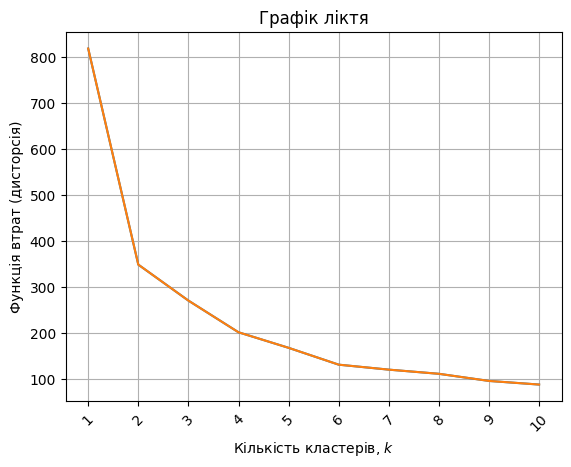

In [47]:
features = data_2d.iloc[:, 1:]

find_optimal_clusters(features, max_clusters=10)

Судячи з графіку число кластерів для `data_2d` дорівнює $2$. Крім того в наших даних перша колонка скоріше за все є класом ознаки. Таких ознак в даних також $2$-і.

## Запуск алгоритму класифікації

In [48]:
k_data_2d = 2

In [53]:
cluster_labels, centroids = perform_kmeans_clustering(features, n_clusters=k_data_2d)

X_ceterod = centroids[:, 0]
y_centroid = centroids[:, 1]

## Візуалізація результат роботи кластеризації

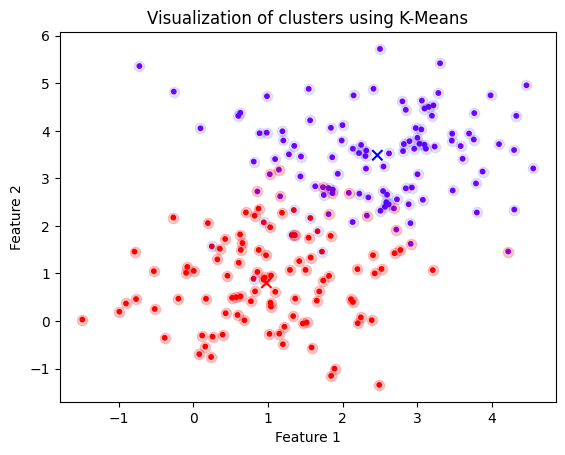

In [55]:

# Кластери
plt.scatter(x=data_2d[1], y=data_2d[2], s=10, c=cluster_labels, cmap='rainbow')
# Центроіди
plt.scatter(X_ceterod, y_centroid, s=55, c=['blue', 'red'], marker='x')


# Класс 1 з data_2d
plt.scatter(x=data_2d[data_2d[0] == 0.0][1], y=data_2d[data_2d[0] == 0.0][2], s=55, alpha=0.2, c='red')

# Класс 2 з data_2d
plt.scatter(x=data_2d[data_2d[0] == 1.0][1], y=data_2d[data_2d[0] == 1.0][2], s=55, alpha=0.1, c='blue')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Visualization of clusters using K-Means")
plt.show()

## Висновки

1. Метод "ліктя" дає число ознак що дорівнює $2$, що підтверджується самим датасетом, де перша колонка є класом, що якої відносяться ознаки. Таких ознак там теж $2$.
2. На графіку зображені кластери та центроїди. На кожну точку певного кластеру накладено "ореол" відомого нам класу с датасету. Бачимо, що алгоритм добре впорався і добре прокласифікував наші дані.